## Soft Voting Classifier

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

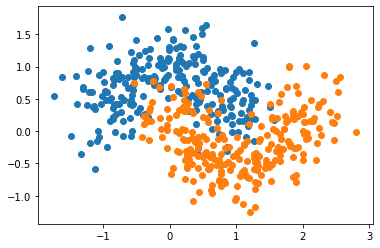

In [17]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 使用 Hard Voting Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='hard')

In [20]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/jupyter/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.896

### 使用 Soft Voting Classifier

In [21]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='soft')

In [22]:
voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/jupyter/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.912